<a href="https://colab.research.google.com/github/ilakshmiteja/Medical_Insurance_Price_Analysis/blob/main/ML1_TabularData(MedicalInsuranceCostAnalysis)_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

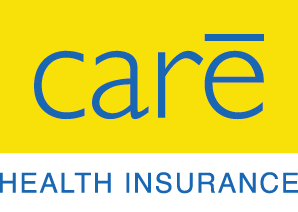

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.express as px
import plotly.io as pio
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders
from category_encoders import TargetEncoder, BinaryEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [4]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.2 MB/s eta 0:00:00


In [6]:
df = pd.read_csv(r"/content/drive/MyDrive/insurance.csv")

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above information we can see that there are 1338 entries and 7 features. There are 2 floating datatype, 2 integer datatype and 3 object datatype features. And there are no missing values in the dataset.

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.duplicated().sum()

1

There is one duplicate value in the dataset.

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

We have dropped the duplicate column.

In [13]:
df = df.reset_index(drop = True)

We have to reset the index after dropping the duplicates.

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


Statistical measures of the numerical columns using describe function.

In [15]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Univariate analysis

Violin plot to understand the distibution of the numerical features and knowing if any outliers are present.

<ipython-input-16-d4cd90030e86>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 1.0, 'Charges')

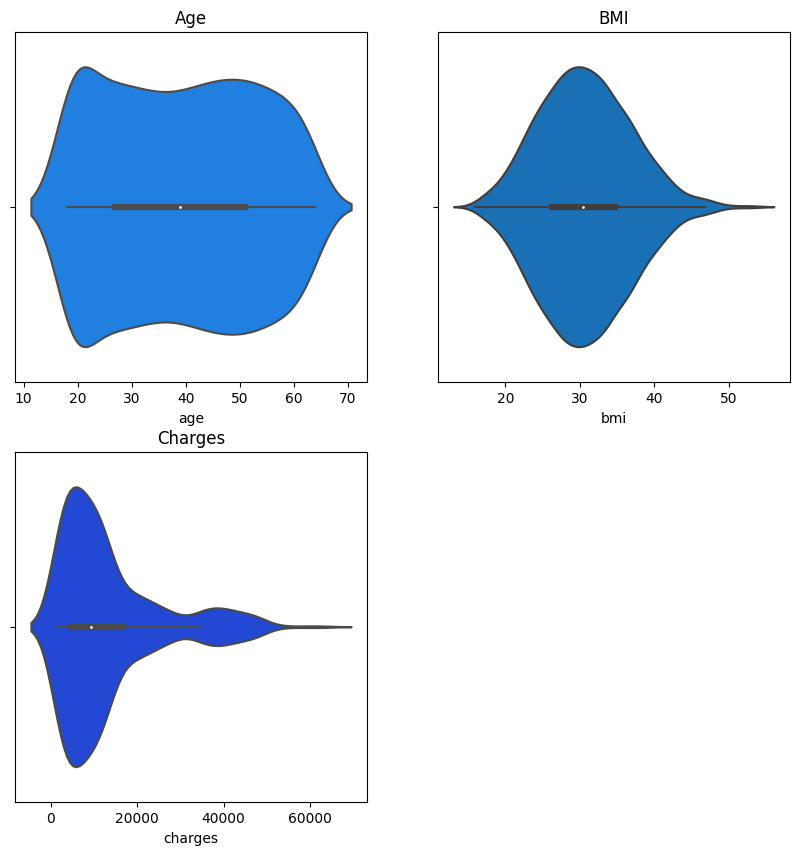

In [16]:
plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='age',data=df,color= '#007FFF')
plt.title("Age")
plt.subplot(2,2,2)
sns.violinplot(x='bmi',data=df,color='#0073CF')
plt.title("BMI")
plt.subplot(2,2,3)
sns.violinplot(x='charges',data=df,color = '#0437F2')
plt.title("Charges")

Insights from the violin plots: we can see that there are no outliers in age column. However, there are outliers present in BMI and Charges. We are planning to retain the outliers as these could represent some unique/extreme cases.

#### Plotting the continuous variables using histograms with Kernel Density Estimator plot.

<Axes: xlabel='charges', ylabel='Count'>

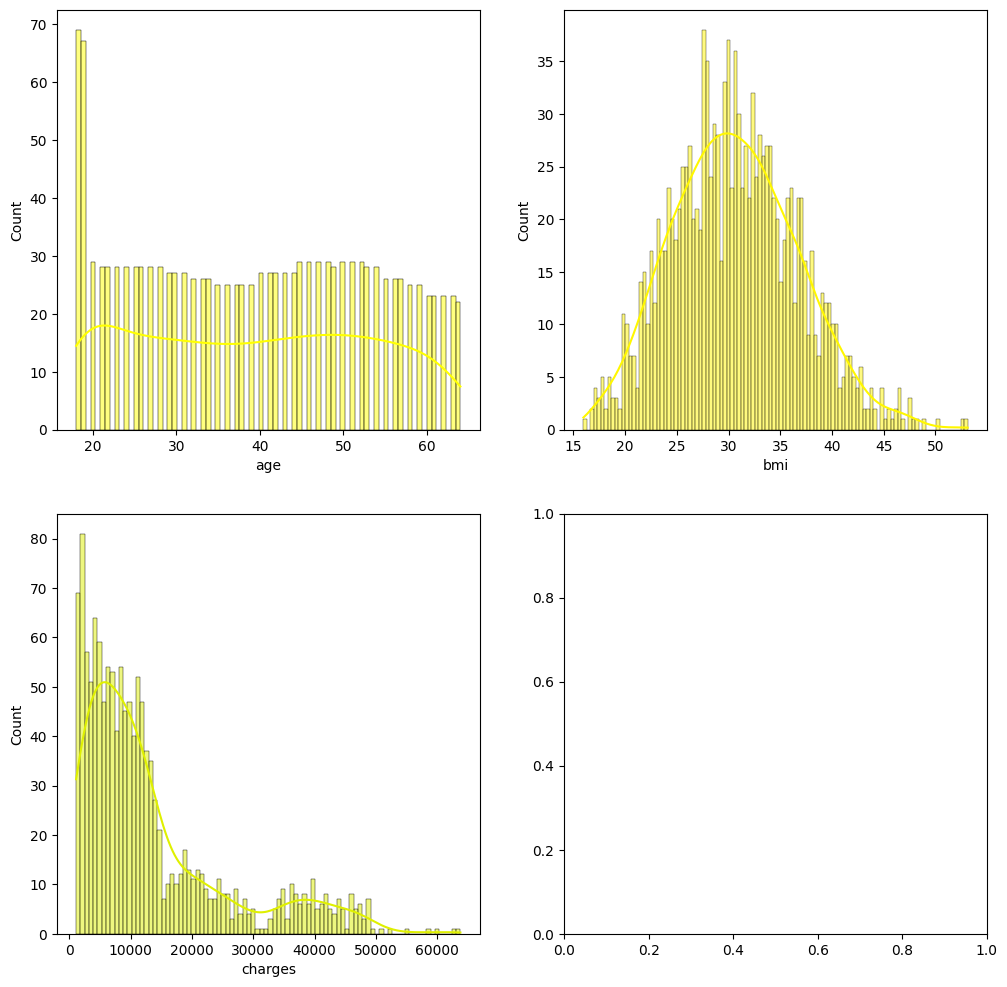

In [17]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
sns.histplot( df["age"],kde = True, bins=80, color="#FFFF00", ax=axes[0][0])
sns.histplot( df["bmi"],kde = True, bins=110, color="#FFF700", ax=axes[0][1])
sns.histplot( df["charges"],kde = True, bins=90, color="#DFF000", ax=axes[1][0])

Insights from the above histograms: Age follows almost a uniform distribution, where BMI follows almost equal to normal distribution. Charges is however, skewed to the right indicating outliers.

#### Pie charts for categorical features

Text(0.5, 1.0, 'Smoker ratios')

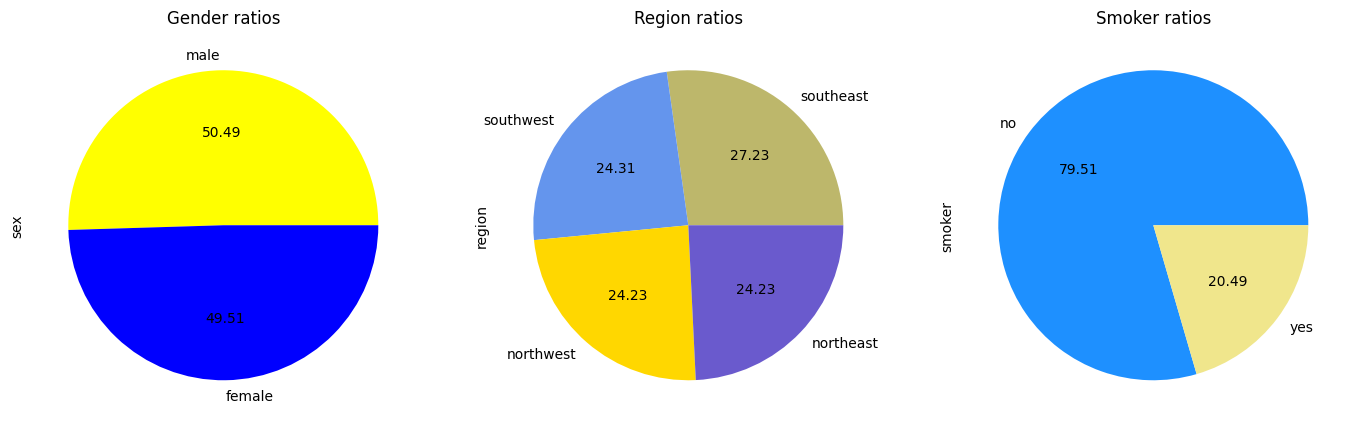

In [18]:
plt.figure(figsize=(17,6))
plt.subplot(1,3,1)
df['sex'].value_counts().plot.pie(autopct="%.2f",colors=['yellow','blue'])
plt.title("Gender ratios")
plt.subplot(1,3,2)
df['region'].value_counts().plot.pie(autopct="%.2f",colors=['darkkhaki','cornflowerblue','gold','slateblue'])
plt.title("Region ratios")
plt.subplot(1,3,3)
df['smoker'].value_counts().plot.pie(autopct="%.2f",colors=['dodgerblue','khaki'])
plt.title("Smoker ratios")

From the above piecharts we can say that we have balance in the classes with respect to Gender and Region. However, there are more non-smokers than smokers.

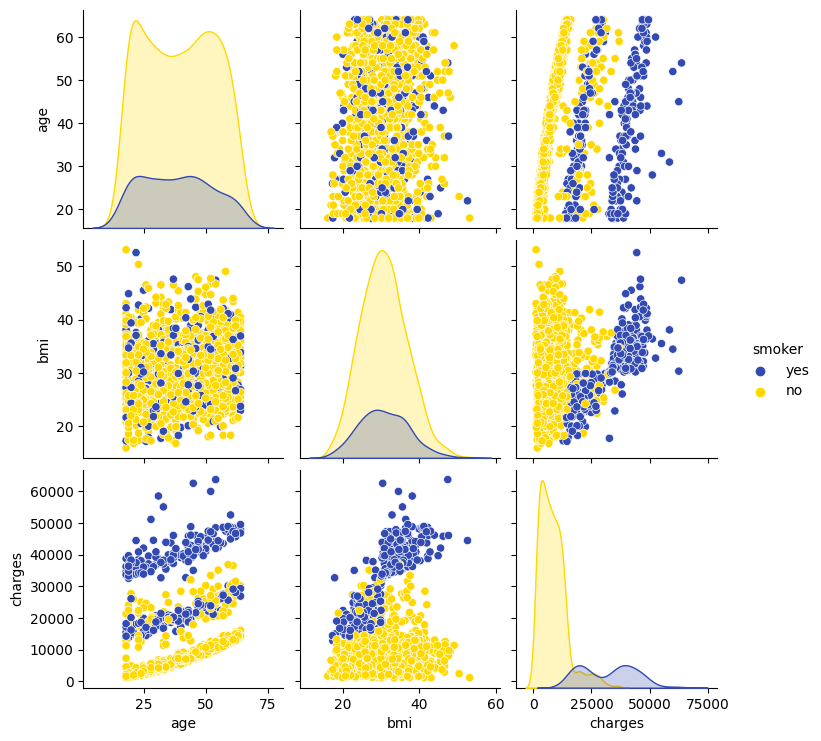

In [19]:
df_pair = df[['age','bmi','smoker','charges']]
sns.pairplot(df_pair, hue="smoker",palette = ['#324AB2','#FFD800'])

Charges paid by smokers is high compared to non-smokers

In [20]:
#create a column for bmi status

def bmi_status(x):
    if x<=18:
        return 'low'
    elif x>18 and x<=25:
        return 'normal'
    elif x>25 and x<=30:
        return 'over'
    else:
        return 'obese'
df['bmi_status']=df.bmi.apply(bmi_status)

<Axes: ylabel='bmi_status'>

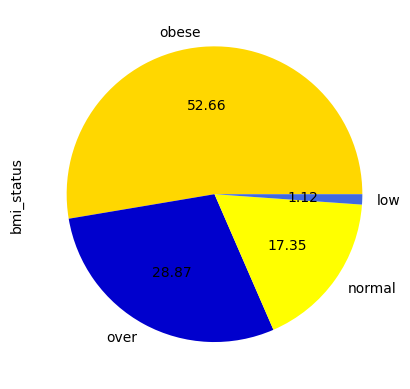

In [21]:
df['bmi_status'].value_counts().plot.pie(autopct="%.2f",colors=['gold','mediumblue','yellow','royalblue'])

In [22]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.900,0,yes,southwest,16884.92400,over
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,over
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,obese
1333,18,female,31.920,0,no,northeast,2205.98080,obese
1334,18,female,36.850,0,no,southeast,1629.83350,obese
1335,21,female,25.800,0,no,southwest,2007.94500,over


<Axes: xlabel='bmi_status', ylabel='count'>

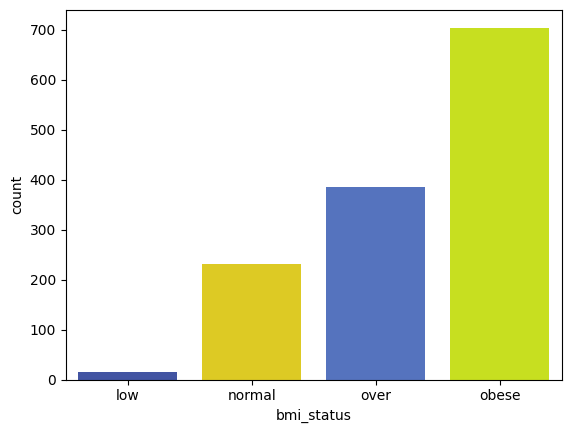

In [23]:
sns.countplot(data=df,x='bmi_status',palette = ['#324AB2','#FCE205','#446CCF','#DFFF00'],order = ['low','normal','over','obese'])

There are very few people who have low BMI index and more people who have very high BMI index (obese).

<Axes: xlabel='bmi_status', ylabel='count'>

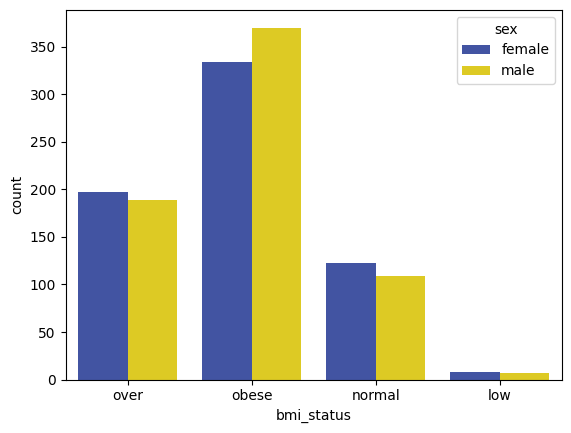

In [24]:
sns.countplot(data=df,x='bmi_status',hue='sex',palette = ['#324AB2','#FCE205'])

In obese class there are more males than females. In over and normal classes there are slightly more females than males.

In [25]:
df_pair['bmi_status'] = df['bmi_status']

<ipython-input-25-f3a11777f7c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair['bmi_status'] = df['bmi_status']


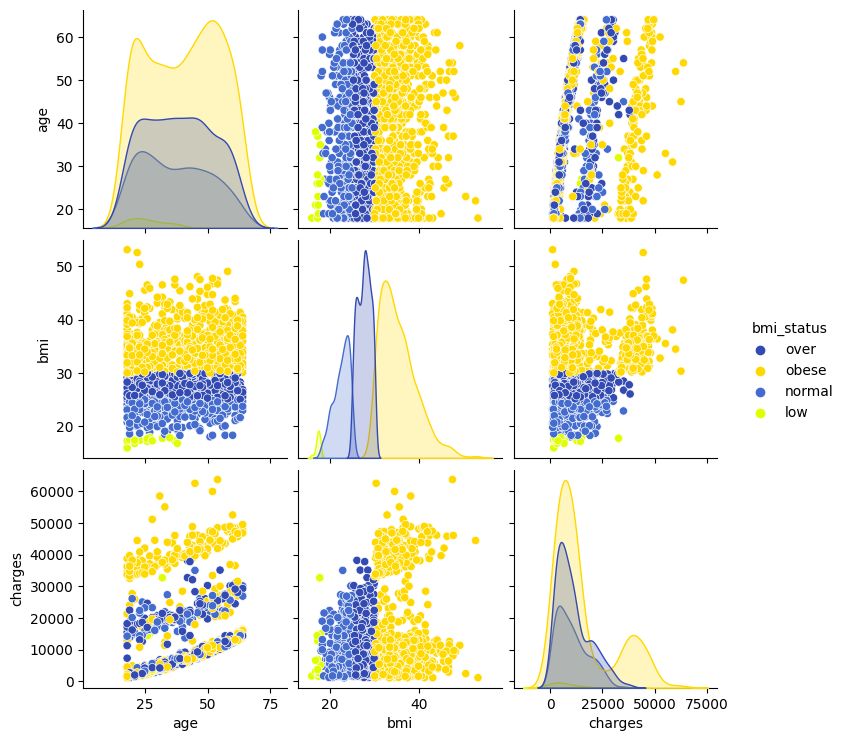

In [26]:
sns.pairplot(df_pair, hue="bmi_status",palette = ['#324AB2','#FFD800','#446CCF','#DFFF00'])

Charges paid by obese class is high compared to other classes.

In [27]:
#create a column for age variable

def age_range(x):
    if x<=18:
        return 'teens'
    elif x>18 and x<=25:
        return 'young adults'
    elif x>25 and x<=40:
        return 'adults'
    elif x>40 and x<60:
        return 'middle age'
    else:
        return 'senior citizens'
df['age_range']=df.age.apply(age_range)

<Axes: ylabel='age_range'>

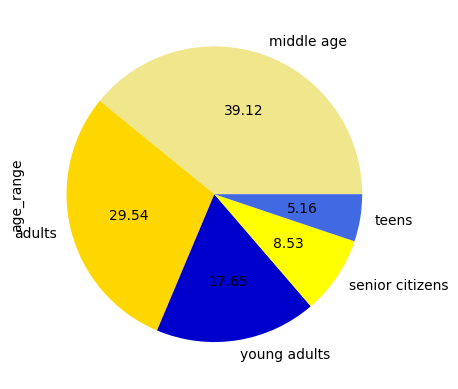

In [28]:
df['age_range'].value_counts().plot.pie(autopct="%.2f",colors=['khaki','gold','mediumblue','yellow','royalblue'])

In [29]:
df_pair['age_range'] = df['age_range']

<ipython-input-29-9173f017dfe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair['age_range'] = df['age_range']


<Axes: xlabel='age_range', ylabel='count'>

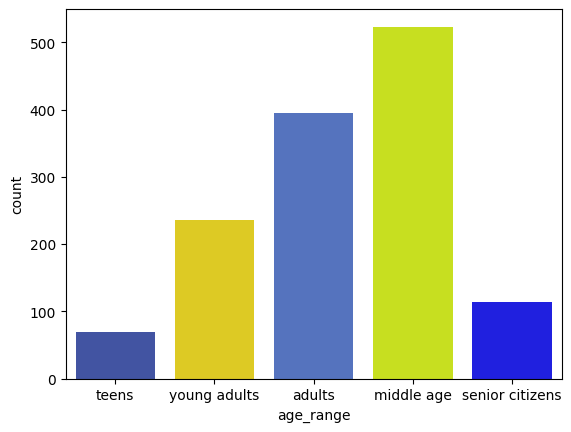

In [30]:
sns.countplot(data=df_pair,x='age_range',palette = ['#324AB2','#FCE205','#446CCF','#DFFF00','blue'],order = ['teens','young adults','adults','middle age','senior citizens'])

There are more middle age people who take the insurance than other age groups.

<Axes: xlabel='age_range', ylabel='count'>

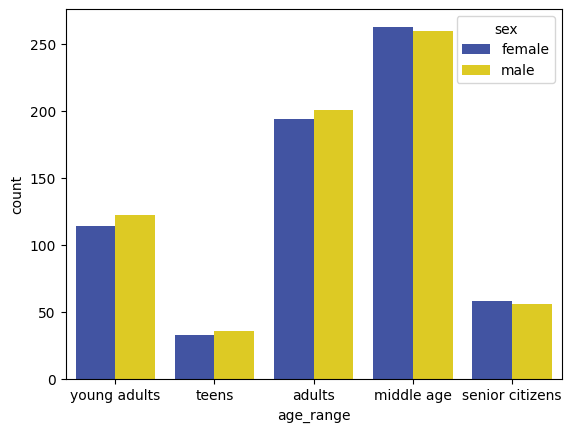

In [31]:
sns.countplot(data=df,x='age_range',hue='sex',palette = ['#324AB2','#FCE205'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The palette list has fewe

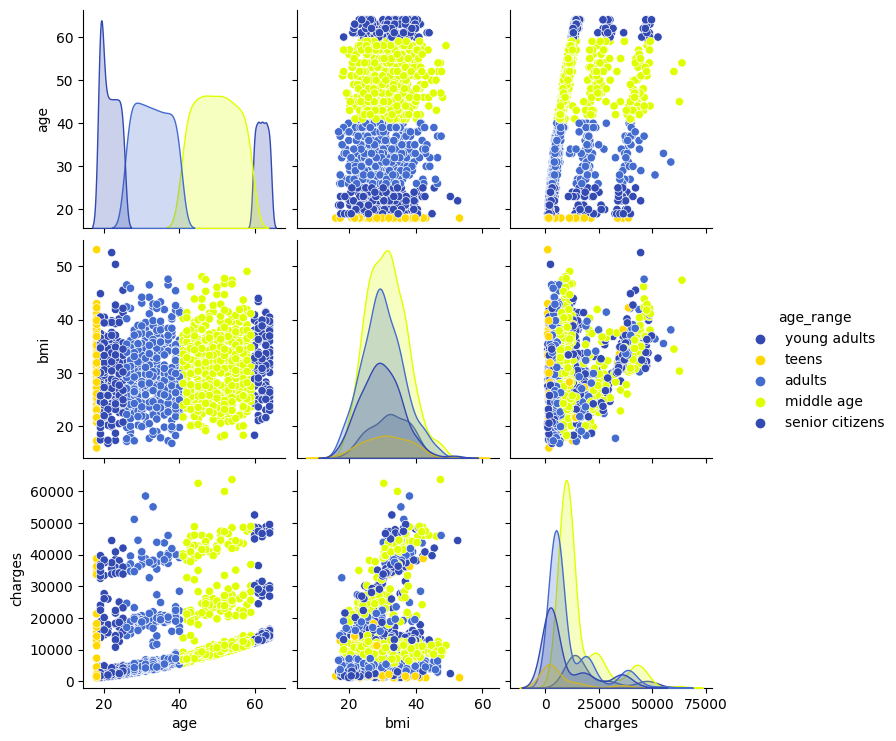

In [32]:
sns.pairplot(df_pair, hue="age_range",palette = ['#324AB2','#FFD800','#446CCF','#DFFF00'])

<Axes: xlabel='region', ylabel='count'>

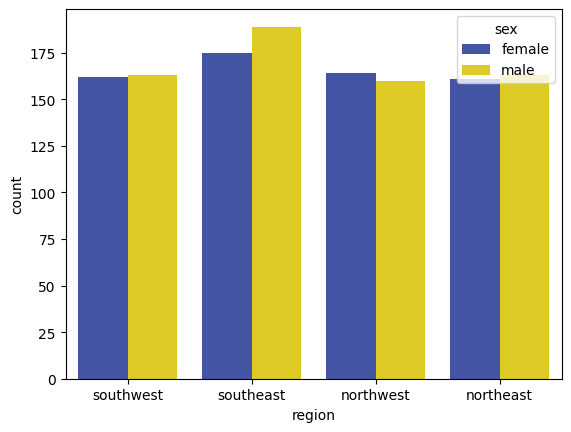

In [33]:
sns.countplot(data = df , x = 'region',hue = 'sex',palette = ['#324AB2','#FCE205'])

Southeast region has more males than females, in other regions the male and female ratio is almost the same.

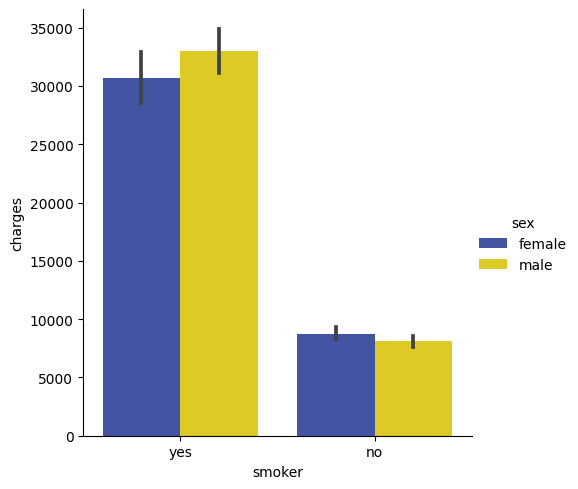

In [34]:
sns.catplot(df,x='smoker',y='charges',hue='sex',kind='bar',palette = ['#324AB2','#FCE205'])

There charges paid by male smokers is more than that of female smokers.

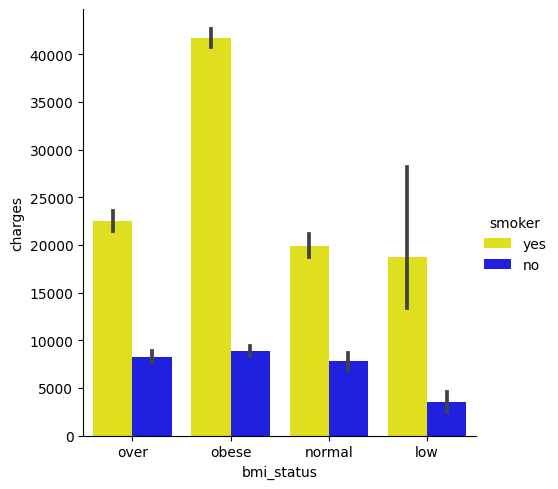

In [35]:
sns.catplot(df,x='bmi_status',y='charges',hue='smoker',kind='bar',palette = ['yellow','blue'])

There are more customers in obese class who are also smokers.

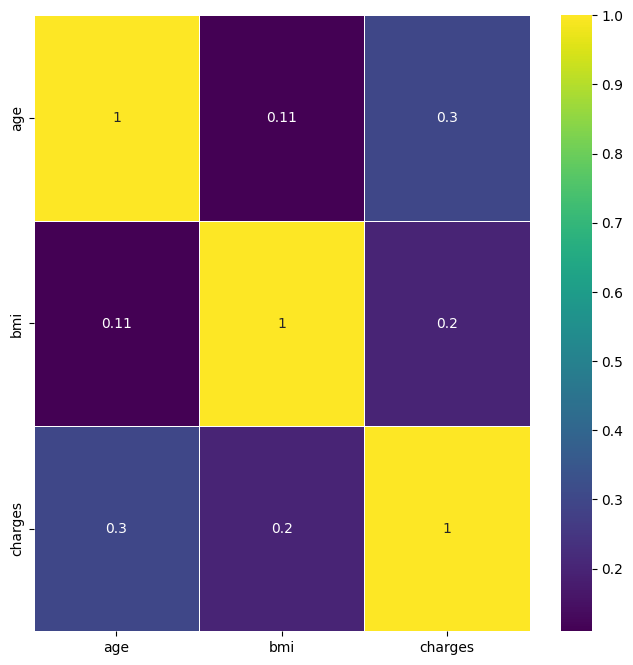

In [36]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(data=df[['age','bmi','charges']].corr(), annot=True, linewidths=.5, ax=axes,cmap = 'viridis')
plt.show()

The above correlation matrix gives an understanding that no continuous column has high impact on the premium charges paid.

In [37]:
crosstab = pd.crosstab(index=df['smoker'],
                       columns=df['bmi_status'])
cm = sns.light_palette("#324AB2", as_cmap=True)
styled_crosstab = crosstab.style.background_gradient(cmap=cm)
styled_crosstab

bmi_status,low,normal,obese,over
smoker,,,,
no,11,181,560,311
yes,4,51,144,75


<Axes: ylabel='smoker'>

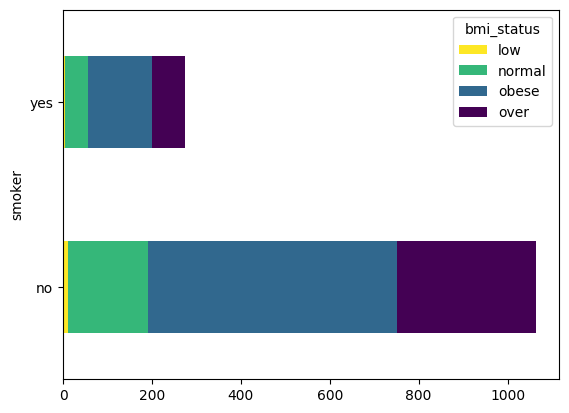

In [38]:
crosstab.plot(kind='barh',stacked = True, colormap = 'viridis_r')

There are more obese class customers irrespective of their smoking condition.

In [42]:
crosstab = pd.crosstab(index=df['smoker'],
                       columns=df['age_range'])
cm = sns.light_palette("#324AB2", as_cmap=True)
styled_crosstab = crosstab.style.background_gradient(cmap=cm)
styled_crosstab

age_range,adults,middle age,senior citizens,teens,young adults
smoker,,,,,
no,311,425,87,57,183
yes,84,98,27,12,53


<Axes: ylabel='smoker'>

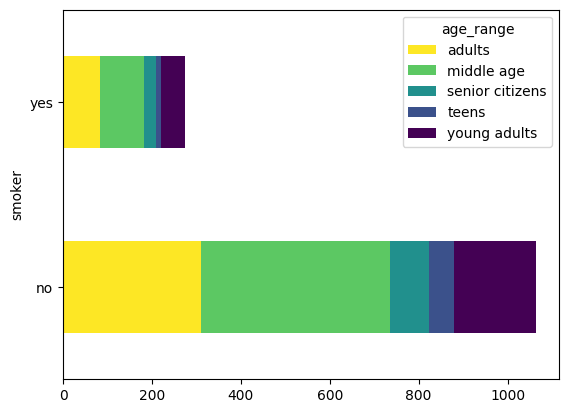

In [43]:
crosstab.plot(kind='barh',stacked = True, colormap = 'viridis_r')

There are more non-smoker middle aged people who took the premium.

In [46]:
agg_df = df.groupby(['bmi_status', 'smoker'])['charges'].mean().reset_index()
pivot_table = agg_df.pivot_table(index='bmi_status', columns='smoker', values='charges', fill_value=0)

cm = sns.light_palette("blue", as_cmap=True)
styled_pivottable = pivot_table.style.background_gradient(cmap=cm)
styled_pivottable

smoker,no,yes
bmi_status,,
low,3510.948941,18756.466225
normal,7792.480060,19924.204746
obese,8866.158926,41692.808992
over,8226.088675,22491.182935


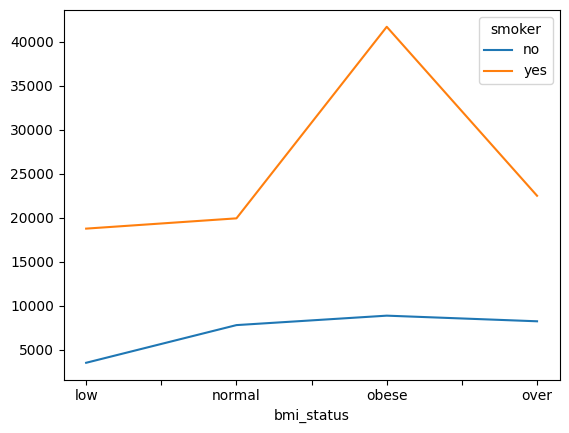

In [47]:
pivot_table.plot()
plt.show()

Obese smokers pay more premium than others.

In [48]:
agg_df = df.groupby(['age_range', 'smoker'])['charges'].mean().reset_index()
pivot_table = agg_df.pivot_table(index='age_range', columns='smoker', values='charges', fill_value=0)

cm = sns.light_palette("blue", as_cmap=True)
styled_pivottable = pivot_table.style.background_gradient(cmap=cm)
styled_pivottable

smoker,no,yes
age_range,,
adults,6233.126770,29103.406812
middle age,11165.570949,34942.524572
senior citizens,15232.709480,40630.695190
teens,3215.162259,25473.730221
young adults,4262.523790,28490.498279


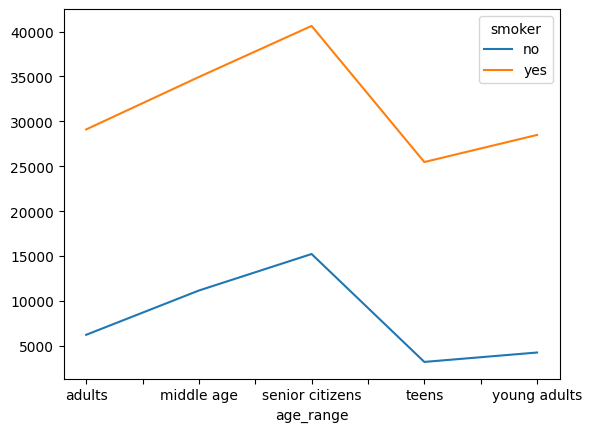

In [50]:
pivot_table.plot()
plt.show()

Premium charges are high for Senior citizens irrespective of whether smoker or not

<Axes: xlabel='age', ylabel='charges'>

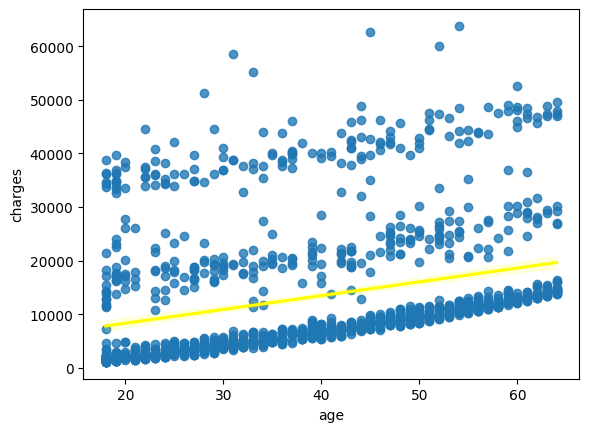

In [41]:
sns.regplot(data = df,x="age",y="charges",line_kws={'color':"yellow"})

The above scatter plot gives information about the anomalies present in the data with respect to age and charges.

<Axes: xlabel='bmi', ylabel='charges'>

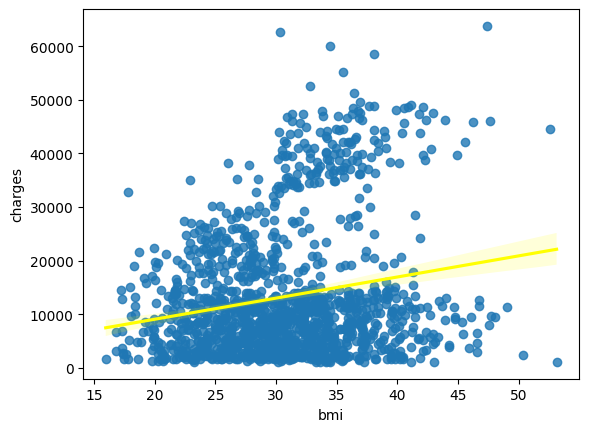

In [ ]:
sns.regplot(data = df,x="bmi",y="charges",line_kws={'color':"yellow"},)

**The** above scatter plot gives information about the anomalies present in the data with respect to bmi and charges.

In [57]:
fig = px.scatter(df,x="age",y="charges",color="bmi_status",animation_frame="smoker",size="bmi")
fig

In [58]:
pio.write_html(fig, file="smoker_bmi.html")

In [59]:
fig = px.scatter(df,x="age",y="charges",color="bmi_status",animation_frame="smoker",size="age",color_discrete_sequence=['#324AB2','#FCE205','#446CCF','#DFFF00'])
fig

In [60]:
pio.write_html(fig, file="smoker_age.html")

In [61]:
fig = px.scatter(df,x="age",y="charges",color="smoker",animation_frame="bmi_status",size="age",color_discrete_sequence=['#324AB2','#FCE205'])
fig

In [62]:
pio.write_html(fig, file="bmi-status_age.html")

In [63]:
fig = px.scatter(df,x="smoker",y="charges",color="bmi_status",animation_frame="region",size="children",color_discrete_sequence=['#324AB2','#FCE205','#446CCF','#DFFF00'])
fig

In [64]:
pio.write_html(fig, file="bmi-status_region.html")

In [65]:
fig = px.scatter_3d(df,x="age",y="bmi",z="charges",color="smoker",title="3D Scatter Plot of Age, BMI and Charges, with Smoker)",
    labels={"age": "Age", "bmi": "BMI", "charges": "Charges"},color_discrete_sequence=['#324AB2','#FCE205']
)
fig

In [66]:
pio.write_html(fig, file="3d scatter.html")

In [67]:
fig = px.sunburst(df, path=['sex','smoker','bmi_status','bmi'], title="Sunburst Chart of Gender, Smoker Status, BMI Status and BMI",color_discrete_sequence=['#324AB2','#FCE205'])
fig

In [68]:
pio.write_html(fig, file = 'sunburst.html')

#### Separating Input features and target feature

In [88]:
X,y = df.drop(columns = ['charges','age_range','bmi_status']),df['charges']

Identifying continuous and categorical columns

In [89]:
cont_col = ['age','bmi']
cat_col = ['sex','smoker','region']

#### Splitting data to train and test.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.20,
                                                    random_state = 42
                                                    )

In [91]:
type(y_test)

pandas.core.series.Series

#### Applying RobustScaler and PowerTransformer on continuous and one hot encoding on categorical features. For this we will implement sklearn pipeline and column transformer.

In [92]:
X_cont_RS__pipeline = Pipeline(steps = [
    ('robustScaler',RobustScaler()),
    ('yeoJohnson', PowerTransformer())
])

In [93]:
X_cont_MMS_pipeline = Pipeline(steps = [
    ('MinMaxScaling',MinMaxScaler()),
     ('yeoJohnson',PowerTransformer())
])

In [94]:
X_cont_SS_pipeline = Pipeline(steps =[
    ('StandardScaling', StandardScaler()),
    (('YeoJohnson'),PowerTransformer())
])

In [95]:
X_cat_OHE_pipeline = Pipeline(steps = [
    ('oneHotEncoding',OneHotEncoder(sparse_output = False, drop = 'first'))
])

In [96]:
X_cat_BE_pipeline = Pipeline(steps=[
    ('binaryEncoding',BinaryEncoder())
])

In [97]:
X_cat_TE_pipeline = Pipeline(steps=[
    ('TargetEncoding',TargetEncoder())
])

In [98]:
X_cat_FE_pipeline = Pipeline(steps=[
    ('FrequencyEncoding',CountFrequencyEncoder())
])

In [99]:
cont_pipelines = {'rs':X_cont_RS__pipeline,'mms':X_cont_MMS_pipeline,'ss':X_cont_SS_pipeline}
cat_pipelines = {'ohe':X_cat_OHE_pipeline,'be':X_cat_BE_pipeline,'te':X_cat_TE_pipeline,'fe':X_cat_FE_pipeline}

In [100]:
coltrans_name = ''
coltrans_list = {}
coltrans_names = []
for cont_name,cont_pl in cont_pipelines.items():
    for cat_name,cat_pl in cat_pipelines.items():
        coltrans_name = cont_name+'_'+cat_name
        coltr_name = coltrans_name
        coltrans_name = ColumnTransformer(transformers = [
            ('X_cont_pipeline',cont_pl,cont_col),
            ('X_cat_pipeline',cat_pl,cat_col),
            ], remainder = 'passthrough')
        coltrans_list[coltr_name] = coltrans_name
        coltrans_names.append(coltr_name)

In [101]:
coltrans_names

['rs_ohe',
 'rs_be',
 'rs_te',
 'rs_fe',
 'mms_ohe',
 'mms_be',
 'mms_te',
 'mms_fe',
 'ss_ohe',
 'ss_be',
 'ss_te',
 'ss_fe']

In [102]:
X_train

,age,sex,bmi,children,smoker,region
1113,23,male,24.510,0,no,northeast
967,21,male,25.745,2,no,northeast
598,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast
...,...,...,...,...,...,...
1095,51,female,34.960,2,yes,northeast
1130,27,male,45.900,2,no,southwest
1294,20,male,22.000,1,no,southwest
860,38,female,28.000,3,no,southwest


In [103]:
y_train

1113     2396.09590
967      3279.86855
598     33471.97189
170     13405.39030
275      9715.84100
           ...     
1095    44641.19740
1130     3693.42800
1294     1964.78000
860      7151.09200
1126     5836.52040
Name: charges, Length: 1069, dtype: float64

#### Linear Regression model

In [104]:
adjusted_r2_scores_linear = {}
for name, pl in coltrans_list.items():
    finalPipeline = Pipeline(steps=[('ColTrans', coltrans_list[name]),
                                    ('LinearRegressionModel',LinearRegression())])
    finalPipeline.fit(X_train,y_train)
    yTestPred=finalPipeline.predict(X_test)
    r2score = r2_score(y_test,yTestPred)
    adjusted_r2_scores_linear[name]= 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))


In [105]:
adjusted_r2_scores_linear

{'rs_ohe': 0.8020329613462385,
 'rs_be': 0.8020329613462385,
 'rs_te': 0.7998846114513202,
 'rs_fe': 0.8010974307563374,
 'mms_ohe': 0.8017542702711431,
 'mms_be': 0.801754270271143,
 'mms_te': 0.7995995903486378,
 'mms_fe': 0.8008093868901982,
 'ss_ohe': 0.8020635964042694,
 'ss_be': 0.8020635964042694,
 'ss_te': 0.7999155242712135,
 'ss_fe': 0.8011286877116319}

#### Decision Tree Regressor

In [106]:
adjusted_r2_scores_dt = {}
for name, pl in coltrans_list.items():
    finalPipeline = Pipeline(steps=[('ColTrans', coltrans_list[name]),
                                    ('DecisionTreeRegressor',DecisionTreeRegressor())])
    finalPipeline.fit(X_train,y_train)
    yTestPred=finalPipeline.predict(X_test)
    r2score = r2_score(y_test,yTestPred)
    adjusted_r2_scores_dt[name]= 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

In [107]:
adjusted_r2_scores_dt

{'rs_ohe': 0.7951512174377826,
 'rs_be': 0.775653633153319,
 'rs_te': 0.7974032325492745,
 'rs_fe': 0.7593895759714634,
 'mms_ohe': 0.7801473106929913,
 'mms_be': 0.793225366364193,
 'mms_te': 0.782447439006949,
 'mms_fe': 0.7575153697913596,
 'ss_ohe': 0.796734619608683,
 'ss_be': 0.8029219010671499,
 'ss_te': 0.7903940631210151,
 'ss_fe': 0.7706507206873828}

#### Random Forest Regressor

In [108]:
adjusted_r2_scores_rf = {}
for name, pl in coltrans_list.items():
    finalPipeline = Pipeline(steps=[('ColTrans', coltrans_list[name]),
                                    ('RandomForestRegressor',RandomForestRegressor())])
    finalPipeline.fit(X_train,y_train)
    yTestPred=finalPipeline.predict(X_test)
    r2score = r2_score(y_test,yTestPred)
    adjusted_r2_scores_rf[name]= 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

In [109]:
adjusted_r2_scores_rf

{'rs_ohe': 0.879158934251176,
 'rs_be': 0.8794645305065066,
 'rs_te': 0.8706962730703808,
 'rs_fe': 0.8743429273374668,
 'mms_ohe': 0.8762460828635453,
 'mms_be': 0.8742838896769975,
 'mms_te': 0.8741675152588708,
 'mms_fe': 0.8765532364797074,
 'ss_ohe': 0.8766962073071104,
 'ss_be': 0.8752898985051342,
 'ss_te': 0.8770959942643933,
 'ss_fe': 0.8759609494547271}

#### XG Booster

In [110]:
adjusted_r2_scores_xg = {}
for name, pl in coltrans_list.items():
    finalPipeline = Pipeline(steps=[('ColTrans', coltrans_list[name]),
                                ('XGBRegressor',XGBRFRegressor())])
    finalPipeline.fit(X_train,y_train)
    yTestPred=finalPipeline.predict(X_test)
    r2score = r2_score(y_test,yTestPred)
    adjusted_r2_scores_xg[name]= 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

In [111]:
adjusted_r2_scores_xg

{'rs_ohe': 0.8951925565943055,
 'rs_be': 0.8956917370094077,
 'rs_te': 0.895468835484479,
 'rs_fe': 0.8959355955809797,
 'mms_ohe': 0.8951925565943055,
 'mms_be': 0.8956917370094077,
 'mms_te': 0.895468835484479,
 'mms_fe': 0.8959355955809797,
 'ss_ohe': 0.8951925565943055,
 'ss_be': 0.8956917370094077,
 'ss_te': 0.895468835484479,
 'ss_fe': 0.8959355955809797}

In [112]:
r2_scores_dict = {'Linear Regression':adjusted_r2_scores_linear,
                  'Decision Tree Regression':adjusted_r2_scores_dt,
                  'Random Forest Regression':adjusted_r2_scores_rf,
                  'XG Boost RF Regression':adjusted_r2_scores_xg,
                  }

In [113]:
adjusted_r2_scores_df = pd.DataFrame(r2_scores_dict)

In [114]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

adjusted_r2_scores_df.style.apply(highlight_max)

,Linear Regression,Decision Tree Regression,Random Forest Regression,XG Boost RF Regression
rs_ohe,0.802033,0.795151,0.879159,0.895193
rs_be,0.802033,0.775654,0.879465,0.895692
rs_te,0.799885,0.797403,0.870696,0.895469
rs_fe,0.801097,0.759390,0.874343,0.895936
mms_ohe,0.801754,0.780147,0.876246,0.895193
mms_be,0.801754,0.793225,0.874284,0.895692
mms_te,0.799600,0.782447,0.874168,0.895469
mms_fe,0.800809,0.757515,0.876553,0.895936
ss_ohe,0.802064,0.796735,0.876696,0.895193
ss_be,0.802064,0.802922,0.875290,0.895692


From the above dataframe we can say that XG Boost Random Forest Regression model provides best accuracy in all cases and Decision Tree Regression model provides worst accuracy in some cases.
Highest accuracy is given for frequency encoded categorical transforamtion with XG Boost RF Regression algorithm.

#### Statistical Analysis- Performing two sample z-test to test our hypothesis.
<b> Null Hypothesis: There is no significant difference between average charges paid by smokers and non-smokers.

<b> Alternate Hypothesis: There is significant difference between average charges paid by smokers and non-smokers.


In [115]:
import statsmodels.api as sm

In [116]:
np.random.seed(100)
sample_size = 100
smokers = df[df['smoker']=='yes']['charges'].sample(sample_size)
non_smokers = df[df['smoker']=='no']['charges'].sample(sample_size)

In [117]:
# 2 sample z-test as we need to check for the mean values of both the samples.
z_stat, p_value = sm.stats.ztest(smokers,non_smokers)
#We have taken alpha = 0.05 (significance level) to attain 95% confidence interval.
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is significant difference between average charges paid by smokers and non-smokers. p_value: ",p_value,"<",alpha)
else:
    print("Fail to reject Null Hypothesis: There is no significant difference between average charges paid by smokers and non-smokers. p_value: ",p_value,">",alpha)


Reject Null Hypothesis: There is significant difference between average charges paid by smokers and non-smokers. p_value:  2.549933129204026e-71 < 0.05


In [123]:
adjusted_r2_scores_linear_mean = {}
for name, pl in coltrans_list.items():
    finalPipeline = Pipeline(steps=[('ColTrans', coltrans_list[name]),
                                ('LinearRegressionModel',LinearRegression())])
    finalPipeline.fit(X_train,y_train)
    yTestPred=pd.Series(y_test.mean() for i in range(len(X_test)))
    r2score = r2_score(y_test,yTestPred)
    adjusted_r2_scores_linear_mean[name]= 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

In [124]:
adjusted_r2_scores_linear_mean

{'rs_ohe': -0.02298850574712641,
 'rs_be': -0.02298850574712641,
 'rs_te': -0.02298850574712641,
 'rs_fe': -0.02298850574712641,
 'mms_ohe': -0.02298850574712641,
 'mms_be': -0.02298850574712641,
 'mms_te': -0.02298850574712641,
 'mms_fe': -0.02298850574712641,
 'ss_ohe': -0.02298850574712641,
 'ss_be': -0.02298850574712641,
 'ss_te': -0.02298850574712641,
 'ss_fe': -0.02298850574712641}

In [125]:
(0.8959 + 0.02299)/0.8959 * 100

102.56613461323806

The XGBoost model gave an adjusted R2 Score 103% greater than the standard linear regression model.